In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
#read initial amazon products file
product_data = pd.read_csv('amazon_products.csv')

In [3]:
product_data.head() #print first five rows of the dataframe

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


The linear correlation between both factors is 0.04


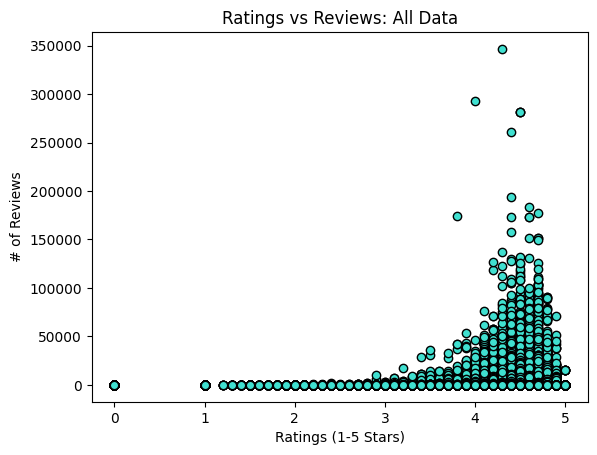

In [4]:
#establishing variables
ratings = product_data["stars"]
reviews = product_data["reviews"]

#calculating correlation r2 value using pearson r equation
correlation = st.pearsonr(ratings, reviews)
print(f"The linear correlation between both factors is {round(correlation[0],2)}")

#determining linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ratings, reviews)
regression_values = ratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"



#creating first graph with linear regression line commented out 
#(The correlation was low enough that I didn't think it useful to include it in the graph)
#plt.plot(ratings, regression_values,"r-")
plt.scatter(ratings, reviews, facecolors="turquoise", edgecolors="black") 
plt.xlabel("Ratings (1-5 Stars)")
plt.ylabel("# of Reviews")
plt.title("Ratings vs Reviews: All Data")
#plt.annotate(lineEquation, (1, 100000), fontsize=12, color="red")
plt.show()




#$What if I omit products with 0 reviews?

The linear correlation between both factors is 0.05


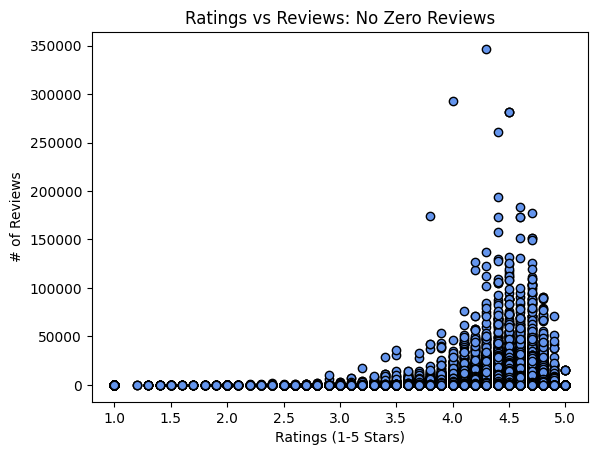

In [5]:
#filtering out products with zero reviews, and storing the results in a new dataframe called noZeroReviews.
noZeroReviews = product_data.loc[product_data["reviews"] > 1]

#Because noZeroReviews contains filtered data, I need to reset the index
noZeroReviews = noZeroReviews.reset_index()

noZeroratings = noZeroReviews["stars"]
noZeroreviews = noZeroReviews["reviews"]



#repeating previous correlation, linear regression, and graphing steps
#note, with the removal of the zero-review products, the linear correlation r2 value increased from 0.04 to 0.05.
correlation = st.pearsonr(noZeroratings, noZeroreviews)
print(f"The linear correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(noZeroratings, noZeroreviews)
regression_values = noZeroratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"
#removing outliers




#plt.plot(noZeroratings, regression_values, "r-")
plt.scatter(noZeroratings, noZeroreviews, facecolors="cornflowerblue", edgecolors="black")
plt.xlabel("Ratings (1-5 Stars)")
plt.ylabel("# of Reviews")
plt.title("Ratings vs Reviews: No Zero Reviews")
#plt.annotate(lineEquation, (1, 100000), fontsize=12, color="red")
plt.show()

In [6]:
#splitting data up into quartiles
Q1 = noZeroReviews["reviews"].quantile(0.25)
Q3 = noZeroReviews["reviews"].quantile(0.75)
IQR = Q3 - Q1

#adjusting noZeroReviews to exclude data that falls into the potential outlier category, based on quartile rules
noZeroReviews = noZeroReviews[(noZeroReviews["reviews"] >= (Q1 - 1.5*IQR)) & (noZeroReviews["reviews"] <= (Q3 + 1.5*IQR))]
noZeroReviews.head()

,index,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
2,46970,B07PN7DPKX,Prolux Core Floor Buffer - Heavy Duty Single P...,https://m.media-amazon.com/images/I/71+t-F84jD...,https://www.amazon.com/dp/B07PN7DPKX,4.2,497,499.99,549.99,175,False,200
14,46982,B08B9LHX9Y,"Simplicity Jill Canister Vacuum Cleaner, Hardw...",https://m.media-amazon.com/images/I/71DiB4JTLq...,https://www.amazon.com/dp/B08B9LHX9Y,4.1,486,159.99,199.99,175,False,100
17,46985,B0BYRPND1F,"FABULETTA Cordless Vacuum Cleaner, Strong Brus...",https://m.media-amazon.com/images/I/61dFEq7opY...,https://www.amazon.com/dp/B0BYRPND1F,4.4,296,119.99,0.00,175,False,3000
20,46988,B0C6K5BR6J,"VacLife 25Kpa Cordless Stick Vacuum Cleaner, 6...",https://m.media-amazon.com/images/I/71TbFwCKe+...,https://www.amazon.com/dp/B0C6K5BR6J,4.4,427,199.99,0.00,175,True,1000
23,46991,B0C2J7R8PY,"Dyson V11 Cordless Stick Vaccum, Large, Nickel...",https://m.media-amazon.com/images/I/51PGx0DtJ6...,https://www.amazon.com/dp/B0C2J7R8PY,4.3,66,462.00,569.99,175,False,700


Now to look at specific categories

In [7]:

#reading the list of Amazon categories (categories are listed by a numbered id in the products file) and printing to a dataframe
category_data = pd.read_csv('amazon_categories.csv')

#renaming the 'id' column to 'category_id' in the category_data dataframe, so that the column names match in both files and can therefore be merged.
category_data = category_data.rename(columns={"id":"category_id"})
category_data.head()

,category_id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [8]:
#merge the product-level dataframe and the category-level dataframe. 
#I did this for both the original dataset (products_and_categories) and the dataset that omitted products with zero reviews (nozero_prodsandcats)
#I ultimately used the dataset that omitted zero-review products when examining data by category.
products_and_categories = pd.merge(product_data, category_data, on="category_id", how="left")
nozero_prodsandcats = pd.merge(noZeroReviews, category_data, on="category_id", how="left")

#here I generated a list of categories that contained any products with at least one review. 
#In this dataset, some categories didn't contain products with any reviews, so I would not be able to graph them. 
#By generating this list, I identified which categories contained products with reviews and could therefore be graphed
nozero_prodsandcats["category_name"].unique()

array(['Vacuum Cleaners & Floor Care', 'Televisions & Video Products',
       'Additive Manufacturing Products', 'Headphones & Earbuds',
       'PlayStation Vita Games, Consoles & Accessories',
       'Wii U Games, Consoles & Accessories',
       'PlayStation 4 Games, Consoles & Accessories', "Boys' Watches",
       "Girls' Clothing", "Boys' Clothing",
       'Pregnancy & Maternity Products',
       'Shaving & Hair Removal Products', 'Fabric Decorating',
       'Industrial Materials', 'Smart Home: Security Cameras and Systems',
       'Office Electronics', 'Sports & Outdoor Play Toys',
       "Kids' Play Tractors", 'Slot Cars, Race Tracks & Accessories',
       'Video Games', 'Smart Home: Voice Assistants and Hubs',
       'Light Bulbs', 'Toys & Games', "Kids' Furniture",
       'Automotive Tires & Wheels', 'Wellness & Relaxation Products',
       'Automotive Tools & Equipment', 'Baby & Toddler Toys',
       "Kids' Play Boats", 'Computer Monitors', "Girls' Jewelry",
       'Luggage', '

The linear correlation between both factors is 0.08


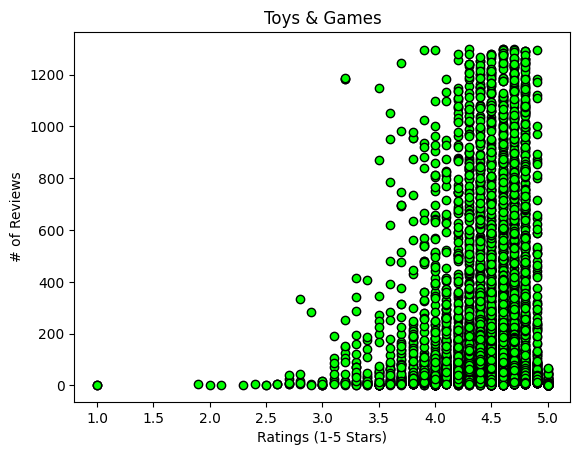

In [9]:
#repeating the original procedure for products in the Toys & Games category
#note: I commented out the linear regression line and equation because the correlation was so low, 
#uncommenting those lines would add the line and equation back to the graph.

toys_and_games = nozero_prodsandcats.loc[nozero_prodsandcats["category_name"] == "Toys & Games"]

toyratings = toys_and_games["stars"]
toyreviews = toys_and_games["reviews"]

correlation = st.pearsonr(toyratings, toyreviews)
print(f"The linear correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(toyratings, toyreviews)
regression_values = toyratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"



#plt.plot(toyratings, regression_values, "r-")
plt.scatter(toyratings, toyreviews, facecolors="lime", edgecolors="black")
plt.xlabel("Ratings (1-5 Stars)")
plt.ylabel("# of Reviews")
plt.title("Toys & Games")
#plt.annotate(lineEquation, (1, 600), fontsize=12, color="red")
plt.show()


The linear correlation between both factors is 0.12


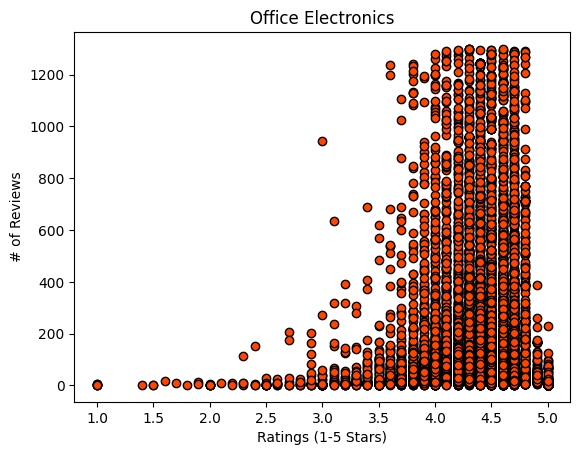

In [10]:
#repeating the original procedure for products in the Office Electronics category
#note: I commented out the linear regression line and equation because the correlation was so low, 
#uncommenting those lines would add the line and equation back to the graph.

shaving = nozero_prodsandcats.loc[nozero_prodsandcats["category_name"] == "Office Electronics"]


officeratings = shaving["stars"]
officereviews = shaving["reviews"]

correlation = st.pearsonr(officeratings, officereviews)
print(f"The linear correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(officeratings, officereviews)
regression_values = officeratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"


#plt.plot(officeratings, regression_values, "b-")
plt.scatter(officeratings, officereviews,facecolors="orangered", edgecolors="black")
plt.xlabel("Ratings (1-5 Stars)")
plt.ylabel("# of Reviews")
plt.title("Office Electronics")
#plt.annotate(lineEquation, (1, 600), fontsize=12, color="blue")
plt.show()


The linear correlation between both factors is 0.08


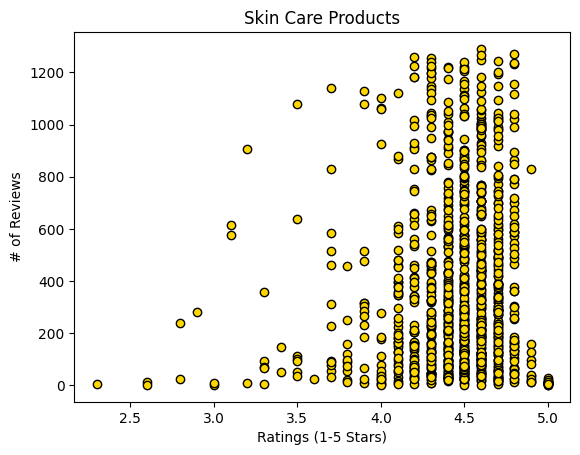

In [11]:
#repeating the original procedure for products in the Skincare category
#note: I commented out the linear regression line and equation because the correlation was so low, 
#uncommenting those lines would add the line and equation back to the graph.

skincare = nozero_prodsandcats.loc[nozero_prodsandcats["category_name"] == "Skin Care Products"]


skincareratings = skincare["stars"]
skincarereviews = skincare["reviews"]

correlation = st.pearsonr(skincareratings, skincarereviews)
print(f"The linear correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(skincareratings, skincarereviews)
regression_values = skincareratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"


#plt.plot(skincareratings, regression_values, "r-")
plt.scatter(skincareratings, skincarereviews, facecolors="gold", edgecolors="black")
plt.xlabel("Ratings (1-5 Stars)")
plt.ylabel("# of Reviews")
plt.title("Skin Care Products")
#plt.annotate(lineEquation, (1, 5000), fontsize=12, color="red")
plt.show()

The linear correlation between both factors is 0.12


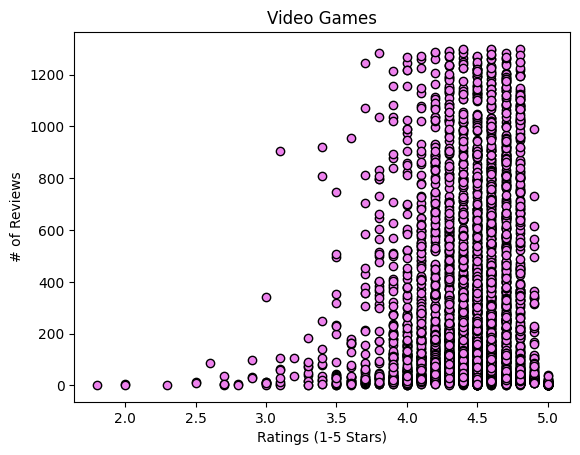

In [12]:
#repeating the original procedure for products in the Video Games category
#note: I commented out the linear regression line and equation because the correlation was so low, 
#uncommenting those lines would add the line and equation back to the graph.

videogames = nozero_prodsandcats.loc[nozero_prodsandcats["category_name"] == "Video Games"]


videogamesratings = videogames["stars"]
videogamesreviews = videogames["reviews"]

correlation = st.pearsonr(videogamesratings, videogamesreviews)
print(f"The linear correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(videogamesratings, videogamesreviews)
regression_values = videogamesratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"


#plt.plot(videogamesratings, regression_values, "r-")
plt.scatter(videogamesratings, videogamesreviews, facecolors="violet", edgecolors="black")
plt.xlabel("Ratings (1-5 Stars)")
plt.ylabel("# of Reviews")
plt.title("Video Games")
#plt.annotate(lineEquation, (1, 5000), fontsize=12, color="red")
plt.show()

